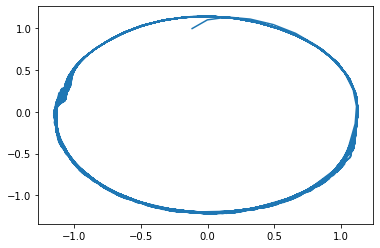

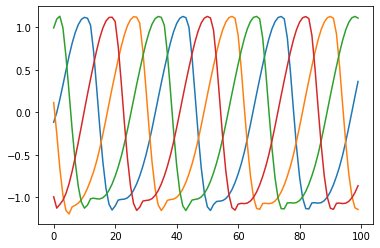

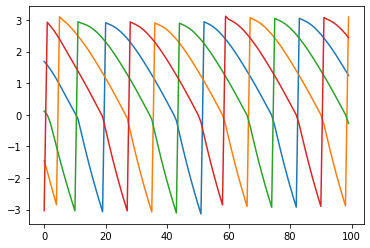

In [2]:
import numpy as np
from blind_walking.envs.utilities.cpg import CPGSystem, CPGParameters

params = CPGParameters(
    a=1.0,
    b=50.0,
    mu=1.0,
    alpha=10.0,
    beta=0.75,
    gamma=50.0,
    period=1.0,  # 1 second to complete a cycle
    dt=0.030,  # 0.03 seconds = 0.001 sim_time_step * 30 action_repeat
)

_walk_offsets = np.array([3 * np.pi / 2, np.pi / 2, np.pi, 0])
_walk_get_foot_contact = lambda phase: 2 * np.logical_or(phase > np.pi / 2, phase < 0).astype(float) - 1

cpg_system = CPGSystem(
    params=params,
    coupling_strength=1,
    desired_phase_offsets=_walk_offsets,
    initial_state=CPGSystem.sample_initial_state(_walk_offsets),
)

state_history = np.zeros((1000, 4, 2))
phase_history = np.zeros((1000, 4))
for i in range(1000):
    state_history[i] = cpg_system.get_state()
    phase_history[i] = cpg_system.get_phase()
    cpg_system.step()

import matplotlib.pyplot as plt
plt.plot(state_history[:,0,0], state_history[:,0,1])
plt.figure()
plt.plot(np.arange(100), state_history[:100, :, 0])
plt.figure()
plt.plot(np.arange(100), phase_history[:100])
